In [29]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})

In [31]:
NAME_TO_CASE = {
    "coinrun": "CoinRun",
    "starpilot": "StarPilot",
    # "caveflyer": "CaveFlyer",
    # "dodgeball": "Dodgeball",
    # "fruitbot": "FruitBot",
    # "chaser": "Chaser",
    # "miner": "Miner",
    # "jumper": "Jumper",
    "leaper": "Leaper",
    # "maze": "Maze",
    "bigfish": "BigFish",
    # "heist": "Heist",
    # "climber": "Climber",
    # "plunder": "Plunder",
    "ninja": "Ninja",
    # "bossfight": "BossFight",
}

# Import data

Read all CSV files form the *results* folder and combine them to a single DataFrame.

In [32]:
csv_files = glob.glob("./results/*.csv")
dataframes = []

for file in csv_files:
    filename = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    df["env_name"], df["env_mode"] = filename.split("_")
    dataframes.append(df)

df_all_envs = pd.concat(dataframes, ignore_index=True)
df_all_envs = df_all_envs.replace({"env_name": NAME_TO_CASE})
df_all_envs["timestep"] = df_all_envs["timestep"] / 1e6

# Plot results

Plot grid with results from all environments

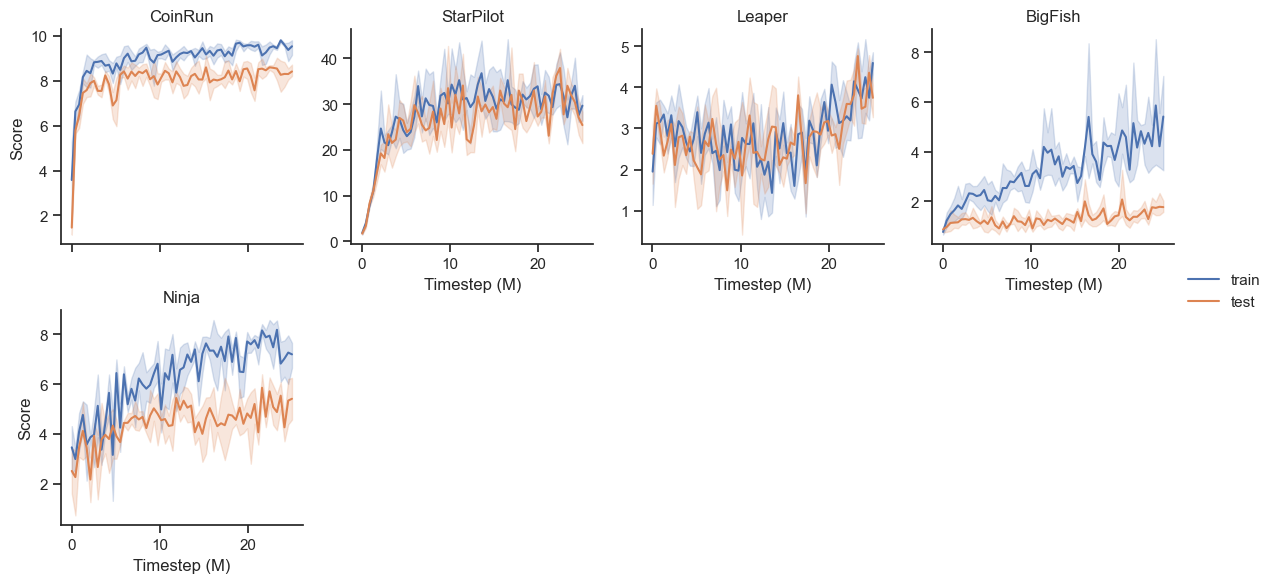

In [33]:
g = sns.FacetGrid(df_all_envs, col="env_name", col_order=NAME_TO_CASE.values(), col_wrap=4, hue="set", sharey=False)
g.map(sns.lineplot, "timestep", "score")
g.set_axis_labels("Timestep (M)", "Score")
g.set_titles(col_template="{col_name}")
g.add_legend(title="")

Plot results from single environment

Text(0.5, 1.0, 'Ninja')

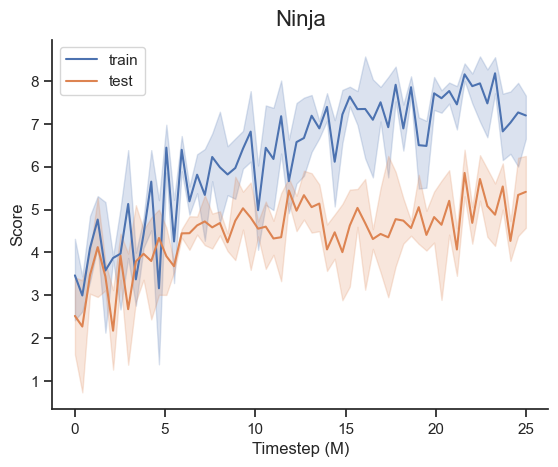

In [34]:
env_name = NAME_TO_CASE["ninja"]

g = sns.lineplot(df_all_envs[df_all_envs["env_name"] == env_name], x="timestep", y="score", hue="set")
plt.legend(title=None)
plt.xlabel("Timestep (M)")
plt.ylabel("Score")
plt.title(env_name, fontsize=16, pad=10)